# "Digit Recognizer" Kaggle Exercise

https://www.kaggle.com/c/digit-recognizer

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Overview

The MNIST dataset is a collection of 60,000 labelled 28px by 28px images of hand-written digits - from 0-9. It is the "hello-world" of neural networks for computer vision. I will use it to classify my own handwritten digit.

##### Purpose:
* To have a clean af notebook for CNN's
* To understand CNN's better

<br/>

#### Initial Method was to use a SVM/SVC - this was too slow!
I switched over to Convolutional Neural Networks

<br/>


## Method

* Import the libraries
* Load the data
* Explore the data - visualise
* Create the graph
* Create the session - train the model
* Make a prediction
* Test the model in the wild

<br/>


## Explanation

* CNN's are really good for computer vision as they resemble the visual cortex present in mammals. Neurons in the visual cortex have a small local receptive field - meaning that they are on the look out for certain feature by activating in unison with other linked neurons in the visual cortex.
* The premise for what CCN's are is: You filter images (which have a huge amount of information) down into it's most important features, then a DNN layer is used for the final classification.
* CNN Architecture
![](https://raw.githubusercontent.com/JRSmiffy/Kaggle/master/digitRecognition/res/CNN0.png)
A CNN can be roughly divided into two main sections: A Feature Extraction layer (with Feature Maps (Convolutions) and Pooling (Subsampling)) and a Classification layer (Fully-Connected NN).
* Feature Extraction: 
![](https://raw.githubusercontent.com/JRSmiffy/Kaggle/master/digitRecognition/res/CNN3.png)
Filters are used to convolve (slide) over the input pixels at specific stride. This is done in order to accentuate certain features that are relevant for classification and under-play features that are irrelevant. A matrix multiplication and summation occurs where a Feature Map is produced from the filter and the input pixels.
![](https://raw.githubusercontent.com/JRSmiffy/Kaggle/master/digitRecognition/res/CNN2.png)
Pooling is the process by which pixels are grouped together and filtered down into a subset. An example is MAXPOOLING2BY2 - where a set of 4 pixels are reduced to one by selecting the max value in the set. Pooling serves to reduce the training time and chance of overfitting by reducing dimensionality / size.
* There are 4 Hyper-Parameters that you need to choose in your architecture: <br>
Filter Size <br/>
Stride Length <br/>
Padding (keeps the feature maps the same size as the input data) <br/>
Filter Count <br/>
* Mulitple Feature Maps can be used in each layer, that will get combined to form the output for that CNN layer.
* Each layer of the CNN looks at a larger section of the overall image - building up groups of features that are the building blocks of real-world objects.


<br/>

Sources:
* TF Udemy Course
* https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/
* https://www.youtube.com/watch?v=x_VrgWTKkiM&vl=en


<br/>


## Observations

* I tried to run this on a Jupyter NB locally, which was too slow! Colab FTW.
* I tried to save and restore the model to GitHub. I couldn't get it to work, so I've settled for Drive.
* 10k steps barely improved on 5k. I reckon a change in architecture is needed. 
* This CNN was built with the run of the mill Tensor Flow. Maybe try **Keras** next time - an abstraction on TF?




# Code

### Imports

In [0]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
from sklearn.model_selection import train_test_split


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# This fixed an issue that kept causing the kernel to die. I have no idea what it does...

### Load the data

In [0]:
url = 'https://raw.githubusercontent.com/JRSmiffy/Kaggle/master/digitRecognition/train.csv'
train_set = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/JRSmiffy/Kaggle/master/digitRecognition/test.csv'
test_set = pd.read_csv(url)

print("train set")
print((train_set.values))

print("test set")
print((test_set.values[0])) # This is a number, without a label

train set
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]
test set
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  17  17  17
  17  81 180 180  35   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 139 253 253 253 253 253 253 253  48   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  60 228 253
 253 253 253 253 253 253 207 197  46   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 213 253 253 253 253 253 253 2

The 60k images are split into train (42K) & test (28K). 
The Train CSV file contains rows comprised of the label for the digit and a grayscale value for each of the 784 pixels for that image. The Test CSV file contains the pixel information, but has no attached label.

### Explore the data

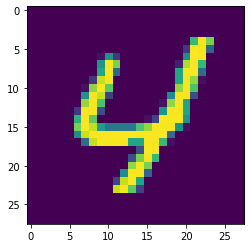

In [0]:
single_image = (train_set.iloc[450, 1:]).values # Extract a single row, convert to array

single_image = single_image.reshape(28,28)
plt.imshow(single_image)

### Make the data usable

In [0]:
X_train = (train_set.iloc[:, 1:]).values # Drop label & convert to array
y_train = (train_set.iloc[:,0]).values # (Drop label)' & convert to array
print("\n")
print("X_train")
print(X_train)
print("\n")
print("y_train")
print(y_train)

# One-Hot Encode y_train
y_train = pd.get_dummies(y_train)
y_train = (y_train.iloc[:, 0:]).values
print("\n")
print("y_train One-Hot Encoded")
print(y_train)


X_test = (test_set.iloc[:, 1:]).values # Drop label & convert to array
print("\n")
print("X_test")
print(X_test)


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=101)



X_train
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


y_train
[1 0 1 ... 7 6 9]


y_train One-Hot Encoded
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


X_test
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Helper functions

#### init_weights & init_bias
Initialize random weights & biases for the fully connected or convolutional layers.

#### conv2d

#### max_pool_2by2

#### convolutional_layer

#### normal_full_layer

#### next_batch


In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

### Create the graph

#### Placeholder

In [0]:
x = tf.placeholder(tf.float32,shape=[None,784])
y_true = tf.placeholder(tf.float32,shape=[None,10])

#### Layers

In [0]:
x_image = tf.reshape(x,[-1,28,28,1])

convo_1 = convolutional_layer(x_image,shape=[6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,rate=1-hold_prob)

y_pred = normal_full_layer(full_one_dropout,10)

#### Loss Function

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

#tf.cast?!?!?!

#### Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

#### Initialize Variables

In [0]:
init = tf.global_variables_initializer()

### Create the session

In [0]:
saver = tf.train.Saver()

In [0]:
steps = 1000
# 1000 steps ~ 95% accuracy - train in approx. 5 mins on Google Colab
# 5000 steps ~ 97.5% accuracy


# Train the model, only if we don't have a model.pt at hand

toggleOff = """

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        batch_x , batch_y = next_batch(50, X_train, y_train)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:X_test,y_true:y_test,hold_prob:1.0}))
            print('\n')
  
    digitRecognitionModel = 'digitRecognitionModel.pt'
    path = F"/content/drive/My Drive/{digitRecognitionModel}"
    saver.save(sess, path)
    
    """
   

Currently on step 0
Accuracy is:
0.09547619


Currently on step 100
Accuracy is:
0.85714287


Currently on step 200
Accuracy is:
0.91190475


Currently on step 300
Accuracy is:
0.92940474


Currently on step 400
Accuracy is:
0.9375


Currently on step 500
Accuracy is:
0.94404763


Currently on step 600
Accuracy is:
0.9489286


Currently on step 700
Accuracy is:
0.95035714


Currently on step 800
Accuracy is:
0.95488095


Currently on step 900
Accuracy is:
0.9584524




### Testing the model in the wild

* Load the digit image from Google Cloud
* Display the unprocessed image
* Convert image to gray-scale
* Resize and crop image (28px by 28px)
* Display the processed image
* Convert the image into an array and flatten it (784 by 1)
* Make a prediction using the model


In [0]:
import matplotlib.image as img
image = img.imread('/content/drive/My Drive/digitRecognition-wild.jpg')

import matplotlib.pyplot as plt


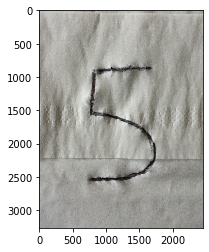

In [0]:
plt.imshow(image, cmap='gist_gray')

#### This is a '5' that I hand-drew on a piece of toilet role. Classy ;)
#### This is how it looks in matplotlib.image:

In [0]:
print(image)

print("\n")
print("array shape:")
print(image.shape)

[[[178 175 170]
  [178 175 170]
  [178 175 170]
  ...
  [164 161 156]
  [164 161 156]
  [163 160 155]]

 [[178 175 170]
  [178 175 170]
  [178 175 170]
  ...
  [164 161 156]
  [163 160 155]
  [163 160 155]]

 [[178 175 170]
  [178 175 170]
  [178 175 170]
  ...
  [163 160 155]
  [162 159 154]
  [162 159 154]]

 ...

 [[161 161 159]
  [161 161 159]
  [161 161 159]
  ...
  [134 133 131]
  [136 135 133]
  [136 135 133]]

 [[161 161 159]
  [161 161 159]
  [161 161 159]
  ...
  [132 131 129]
  [136 135 133]
  [138 137 135]]

 [[161 161 159]
  [161 161 159]
  [161 161 159]
  ...
  [130 129 127]
  [136 135 133]
  [140 139 137]]]


array shape:
(3264, 2448, 3)


#### It is a 3264 by 2448 array with each element being an array of length 3, corresponding to each pixels RGB values

In [0]:
import math

# crop image - keep the middle 2000px
xStart = math.floor((3264 - 2000) / 2)
xStop = 3264 - xStart
yStart = math.floor((2448 - 2000) / 2)
yStop = 2448 - yStart

imageCropped = image[xStart:xStop, yStart:yStop]

# confirm cropped image shape
print(imageCropped.shape)

image = imageCropped

print(image)

(2000, 2000, 3)
[[[192 191 186]
  [190 189 184]
  [188 187 182]
  ...
  [148 145 138]
  [143 140 133]
  [140 137 130]]

 [[190 189 184]
  [188 187 182]
  [187 186 181]
  ...
  [147 144 137]
  [143 140 133]
  [140 137 130]]

 [[189 188 183]
  [187 186 181]
  [185 184 179]
  ...
  [147 144 137]
  [143 140 133]
  [141 138 131]]

 ...

 [[171 170 166]
  [171 170 166]
  [171 170 166]
  ...
  [162 161 156]
  [159 158 153]
  [157 156 151]]

 [[171 170 166]
  [171 170 166]
  [171 170 166]
  ...
  [163 162 157]
  [160 159 154]
  [158 157 152]]

 [[171 170 166]
  [171 170 166]
  [171 170 166]
  ...
  [164 163 158]
  [161 160 155]
  [158 157 152]]]


[[[0.70588235 0.70196078 0.68235294]
  [0.69019608 0.68627451 0.66666667]
  [0.6627451  0.65882353 0.63529412]
  ...
  [0.62352941 0.61960784 0.59215686]
  [0.56078431 0.55294118 0.5254902 ]
  [0.5372549  0.52941176 0.50196078]]

 [[0.69803922 0.69411765 0.67058824]
  [0.68235294 0.67843137 0.65882353]
  [0.65854342 0.65098039 0.62745098]
  ...
  [0.60392157 0.6        0.57254902]
  [0.54117647 0.53585434 0.50588235]
  [0.53333333 0.52941176 0.49803922]]

 [[0.68627451 0.68627451 0.6627451 ]
  [0.6745098  0.6745098  0.65098039]
  [0.65098039 0.64705882 0.62352941]
  ...
  [0.58459384 0.58431373 0.55686275]
  [0.5372549  0.53333333 0.50588235]
  [0.54901961 0.54509804 0.51764706]]

 ...

 [[0.63921569 0.63529412 0.61568627]
  [0.64313725 0.64313725 0.62352941]
  [0.62352941 0.62745098 0.60784314]
  ...
  [0.51764706 0.51764706 0.49803922]
  [0.52941176 0.52941176 0.51372549]
  [0.52156863 0.52156863 0.50196078]]

 [[0.63137255 0.62745098 0.61176471]
  [0.60784314 0.60392157 0.58431373]


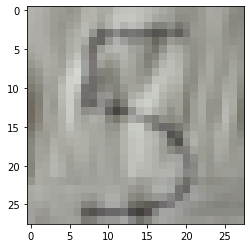

In [0]:
from skimage.transform import resize

imageResized = resize(image, (28,28),
                       anti_aliasing=True)

image = imageResized

plt.imshow(image)

print(image)


In [0]:
flatten = []
for i in range(0,28):
    for j in range(0,28):
        flatten.append((sum(image[i][j])/ 3))
        
print(flatten)
print(len(flatten))

[0.6967320261437907, 0.6810457516339868, 0.6522875816993464, 0.6084967320261434, 0.5973856209150327, 0.5738562091503268, 0.5957983193277314, 0.6784313725490195, 0.6941176470588234, 0.6600373482726419, 0.6615779645191411, 0.7320261437908497, 0.7503267973856209, 0.7594771241830065, 0.7398692810457517, 0.7163398692810459, 0.6901027077497662, 0.6567226890756298, 0.6222222222222222, 0.5673202614379084, 0.5673202614379084, 0.5581699346405228, 0.596078431372549, 0.65359477124183, 0.641176470588235, 0.611764705882353, 0.5464052287581699, 0.5228758169934641, 0.6875816993464051, 0.6732026143790849, 0.6456582633053217, 0.603921568627451, 0.5882352941176471, 0.5916900093370682, 0.6100773642790455, 0.6937508336668002, 0.6932773109243694, 0.6469654528478054, 0.6947712418300659, 0.7633986928104575, 0.7660130718954248, 0.7699346405228757, 0.742483660130719, 0.7045751633986929, 0.6500466853408026, 0.6235294117647059, 0.6084633853541409, 0.5414765906362544, 0.5477124183006535, 0.5633986928104574, 0.6, 0

In [0]:
correctInput = np.asarray(flatten, dtype=np.float32)
correctInput = correctInput.reshape(784,)

(784,)
(1, 784)
(10,)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/digitRecognitionModel.pt
[[-0.7709128 -1.4190662  1.4103343 -1.3183383 -1.7122203  2.0546787
   2.33877   -1.6699709  2.2801945 -0.6369967]]
[6]


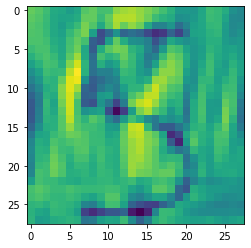

In [0]:
image = correctInput
print(image.shape)
# (784,)
image = np.array([image],)
print(image.shape)
# (1, 784)
image = image.reshape(1,784)
label = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,],)
print(label.shape)
label = label.reshape(1,10)

with tf.Session() as sess:
  
  digitRecognitionModel = 'digitRecognitionModel.pt'
  path = F"/content/drive/My Drive/{digitRecognitionModel}"
  saver.restore(sess, path)

  plt.imshow(image.reshape(28,28))
  result = sess.run(y_pred,feed_dict={x: image,hold_prob:1.0})
  print(result)
  print(sess.run(tf.argmax(result,1)))

### Looking at this image, compared to the 4 at the top of the page, it isn't hard to see why the algorithm struggled to classify it correcty! 

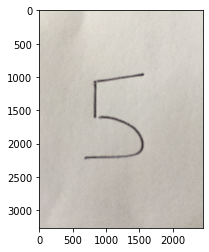

In [0]:
image = img.imread('/content/drive/My Drive/digitRecognition-wild-2.JPG')

# This bastard was the wrong way round (rot-90?)
image = np.rot90(image)
image = np.rot90(image)
image = np.rot90(image)

plt.imshow(image)



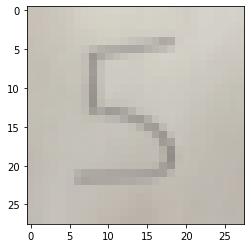

In [0]:
# crop image - keep the middle 2000px
xStart = math.floor((3264 - 2000) / 2)
xStop = 3264 - xStart
yStart = math.floor((2448 - 2000) / 2)
yStop = 2448 - yStart

imageCropped = image[xStart:xStop, yStart:yStop]

image = imageCropped

imageResized = resize(image, (28,28),
                       anti_aliasing=True)

image = imageResized

plt.imshow(image)


(784,)
(1, 784)
(10,)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/digitRecognitionModel.pt
[[-0.7075896  -1.5708842   1.4632807  -2.060326   -2.7657206   2.8417618
   2.5307634  -1.5903347   1.6659929   0.00584985]]
[5]


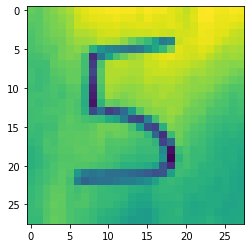

In [0]:
flatten = []
for i in range(0,28):
    for j in range(0,28):
        flatten.append((sum(image[i][j])/ 3))

correctInput = np.asarray(flatten, dtype=np.float32)
correctInput = correctInput.reshape(784,)

image = correctInput
print(image.shape)
# (784,)
image = np.array([image],)
print(image.shape)
# (1, 784)
image = image.reshape(1,784)
label = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,],)
print(label.shape)
label = label.reshape(1,10)

with tf.Session() as sess:
  
  digitRecognitionModel = 'digitRecognitionModel.pt'
  path = F"/content/drive/My Drive/{digitRecognitionModel}"
  saver.restore(sess, path)

  plt.imshow(image.reshape(28,28))
  result = sess.run(y_pred,feed_dict={x: image,hold_prob:1.0})
  print(result)
  print(sess.run(tf.argmax(result,1)))


  # How sure am I?
  # WHW I would take the result array, positive all the values and sigmoid the ting


## Yes! This '5', which is clearer than the last, is classified correctly! Training on the MNIST dataset has had carry over into the wild....

#### done.